In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [3]:
raw_data = pd.read_csv("Women's Ecommerce Data (With Sentiment Scores).csv")

# Preprocess Data
raw_data.loc[raw_data['Review Sentiment'] == -99, 'Review Sentiment'] = np.nan
raw_data.loc[raw_data['Title Sentiment'] == -99, 'Title Sentiment'] = np.nan

raw_data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Sentiment,Title Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.999423,NaN
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.999910,NaN
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,-0.999981,-0.999869
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.998425,0.999400
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.999157,0.639610


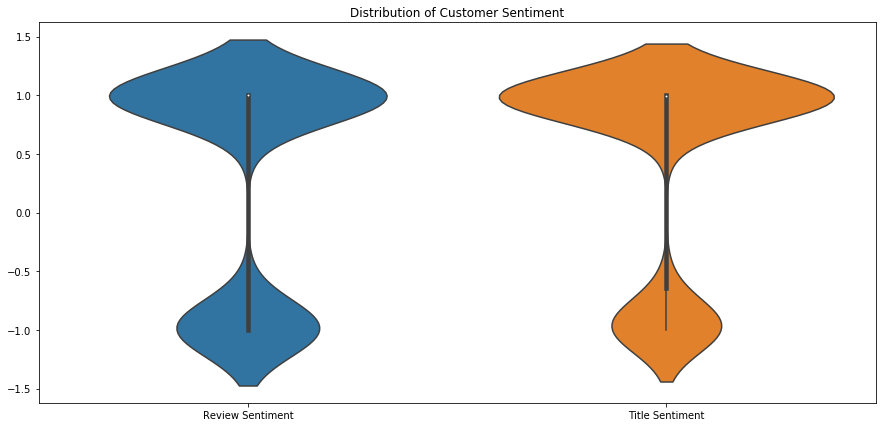

In [4]:
sentiment_scores = raw_data[['Review Sentiment', 'Title Sentiment']].sample(1000)

plt.figure(figsize=(15,7))
sns.violinplot(data=sentiment_scores)
plt.title("Distribution of Customer Sentiment")
plt.show()

### KMeans example with Review Data

In [5]:
X = raw_data.copy()
X = X.select_dtypes('number').drop(['Clothing ID'], axis=1)

# Handle Missing Values
X = X.dropna()

# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# Example Kmeans
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_X)

kmeans.predict(scaled_X)

array([0, 1, 1, ..., 0, 3, 5])

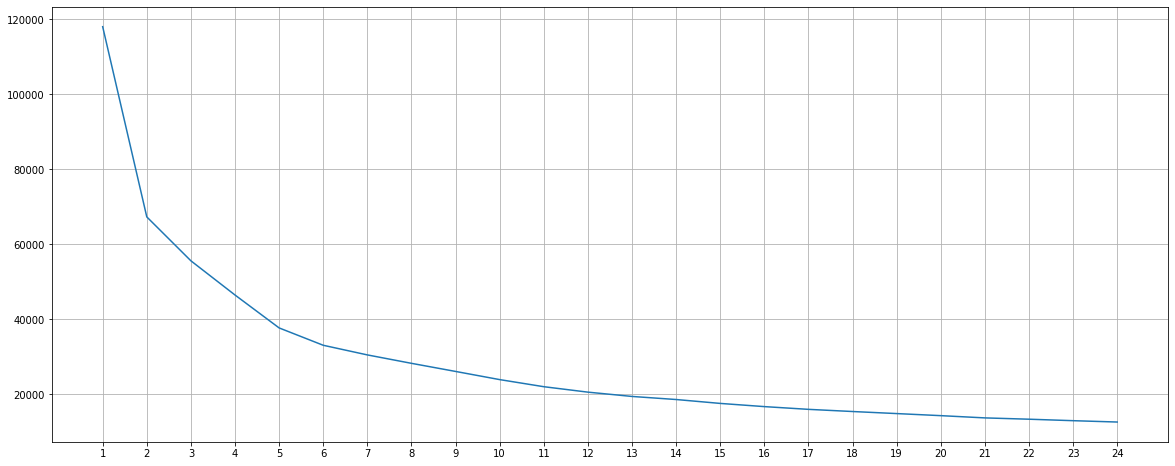

In [6]:
elbow_y = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    
    elbow_y.append(kmeans.inertia_)
    
plt.figure(figsize=(20,8))
plt.plot(range(1,25), elbow_y)
plt.xticks(range(1,25))
plt.grid()

In [7]:
# Ideal k = 6

### KMeans with  Clothing Item Data

**Specifications**
Number of Rows (Individual Items) = 1206

**Features**
1. Class Name
2. Department Name
3. Division Name

4. Ratings Related Features
 - Total number of ratings
 - 5 stars
 - 4 stars
 - 3 stars
 - 2 stars
 - 1 star
 

5. Sentiment Related Features
 - Number of Positive Reviews
 - Number of Negative Reviews
 - *Number of Positive Titles?*
 - *Number of Negative Titles?*
 - *Overall Product Sentiment score?*
 - Median Sentiment Score
 - Mean Sentiment Score
 

6. Age Features?
 - 0 to 20 Count
 - 20 to 30
 - 30 to 40
 - 40 to 50
 - 50 to 60
 - 60 to 70
 - 70 to 80
 - 80 to 90
 - 90 above

#### Missing Division, Department, Class Name

72 - Socks
492 - Hoodie
152 - Leg Warmer
184 - Tights
772 - Sweatshirt
665 - Intimates
136 - Socks

In [8]:
raw_data.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Sentiment,Title Sentiment
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.999796,0.996868
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,-0.999807,-0.997335
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,-0.999916,-0.530369
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,-0.999735,0.997840
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,0.998965,0.910598


In [9]:
data_modified = raw_data.copy()
data_modified['Clothing ID'] = data_modified['Clothing ID'].astype(str) + " " + data_modified['Division Name']

In [10]:
# Create a DataFrame with Class Name, Department Name, Division Name
class_df = data_modified[[('Clothing ID'), ('Class Name'), ('Department Name'), ('Division Name')]]
class_df = class_df.drop_duplicates().dropna()
class_dummies = pd.get_dummies(class_df[['Class Name', 'Department Name', 'Division Name']])

class_df = pd.concat((class_df['Clothing ID'], class_dummies), axis=1)
class_df.head()

,Clothing ID,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,...,Class Name_Trend,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates
0,767 Initmates,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1080 General,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1077 General,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1049 General Petite,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,847 General,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [11]:
# s = class_df['Mod Clothing ID'].value_counts() > 1
# duplicate_ids = s.where(s == True).dropna().index

# # Are there any duplicate IDs - If yes (change that, always have unique IDs)
# class_df[class_df['Mod Clothing ID'].isin(duplicate_ids)].sort_values(by='Mod Clothing ID')

In [12]:
rating_dummies = pd.get_dummies(data_modified['Rating'], prefix='Rating')
rating_df = pd.concat((data_modified['Clothing ID'], rating_dummies), axis=1)
rating_df = rating_df.groupby(by='Clothing ID').sum().astype(int)
rating_df['Total Ratings'] = rating_df.sum(axis=1)
rating_df.head()

,Rating_1,Rating_2,Rating_3,Rating_4,Rating_5,Total Ratings
Clothing ID,,,,,,
0 General,0,0,0,0,1,1
1 Initmates,0,1,0,0,2,3
10 Initmates,0,0,0,1,0,1
100 Initmates,0,0,0,1,0,1
1000 General,0,0,0,1,2,3


In [13]:
def classify_sentiment(x):
    if x > 0:
        return "Positive"
    if x <= 0:
        return "Negative"

sentiment_df = data_modified[['Clothing ID','Review Sentiment', 'Title Sentiment']].copy()
sentiment_df['Review Polarity'] = sentiment_df['Review Sentiment'].apply(classify_sentiment)
sentiment_df['Title Polarity'] = sentiment_df['Title Sentiment'].apply(classify_sentiment)

sentiment_dummies = pd.get_dummies(sentiment_df[['Review Polarity', 'Title Polarity']])
sentiment_df = pd.concat((sentiment_df, sentiment_dummies), axis=1)
sentiment_df = sentiment_df.drop(['Review Polarity', 'Title Polarity'], axis=1)

sentiment_df = sentiment_df.groupby('Clothing ID').agg({"Review Sentiment": "mean",
                                         "Title Sentiment" : "mean",
                                         "Review Polarity_Negative" : "sum",
                                         "Review Polarity_Positive" : "sum",
                                         "Title Polarity_Negative" : "sum",
                                         "Title Polarity_Positive" : "sum"
    
})

sentiment_df.tail()

,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive
Clothing ID,,,,,,
996 General Petite,0.376421,0.600259,13,30.0,8,32.0
997 General Petite,0.248760,0.400401,3,5.0,2,5.0
998 General,0.241643,0.161920,3,5.0,3,4.0
999 General,0.247377,0.422733,8,13.0,6,14.0
999 General Petite,0.001577,0.476456,7,7.0,3,8.0


In [14]:
age_df = data_modified[['Clothing ID', 'Age']].copy()
age_df['Age Demographic'] = pd.cut(age_df['Age'], [0,20,30,40,50,60,70,80,90,150])

age_dummies = pd.get_dummies(age_df['Age Demographic'])
age_df = pd.concat((age_df, age_dummies), axis=1)
age_df = age_df.drop(['Age', 'Age Demographic'], axis=1)
age_df = age_df.groupby('Clothing ID').sum()
age_df

,"(0, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 150]"
Clothing ID,,,,,,,,,
0 General,0,1,0,0,0,0,0,0,0
1 Initmates,0,1,1,1,0,0,0,0,0
10 Initmates,0,0,1,0,0,0,0,0,0
100 Initmates,0,0,0,1,0,0,0,0,0
1000 General,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
996 General Petite,0,7,17,9,3,6,1,0,0
997 General Petite,0,1,1,2,5,0,0,0,0
998 General,0,1,2,2,1,2,0,0,0


In [37]:
# Class Df, Age Df, Rating Df, Sentiment Df

cluster_df = pd.merge(sentiment_df, age_df, on='Clothing ID')
cluster_df = pd.merge(cluster_df, rating_df, on='Clothing ID')
cluster_df = pd.merge(cluster_df, class_df, on='Clothing ID')
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clothing ID                   1395 non-null   object 
 1   Review Sentiment              1368 non-null   float64
 2   Title Sentiment               1290 non-null   float64
 3   Review Polarity_Negative      1395 non-null   uint8  
 4   Review Polarity_Positive      1395 non-null   float64
 5   Title Polarity_Negative       1395 non-null   uint8  
 6   Title Polarity_Positive       1395 non-null   float64
 7   (0, 20]                       1395 non-null   uint8  
 8   (20, 30]                      1395 non-null   uint8  
 9   (30, 40]                      1395 non-null   uint8  
 10  (40, 50]                      1395 non-null   uint8  
 11  (50, 60]                      1395 non-null   uint8  
 12  (60, 70]                      1395 non-null   uint8  
 13  (70

In [16]:
X = cluster_df.copy()
X = X.drop(['Clothing ID'], axis=1)

# Handle Missing Values
X = X.dropna()

# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# # Example Kmeans
# k = 8
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(scaled_X)

# kmeans.predict(scaled_X)

In [17]:
elbow_y = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    
    elbow_y.append(kmeans.inertia_)

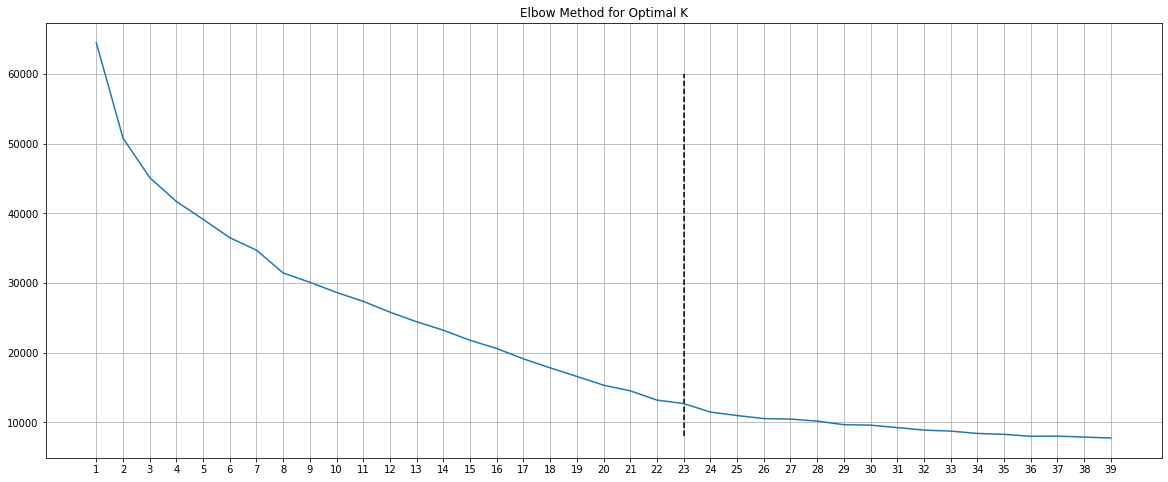

In [18]:
plt.figure(figsize=(20,8))
plt.title("Elbow Method for Optimal K")
plt.plot(range(1,40), elbow_y)

plt.vlines(23, 8000, 60000, linestyle='--')

plt.xticks(range(1,40))
plt.grid()

##### Optimal K = 23

In [19]:
k = 23

kmeans = KMeans(n_clusters=k, random_state=247)
kmeans.fit(scaled_X)

clusters = kmeans.predict(scaled_X)

cluster_df = cluster_df.dropna().copy()

cluster_df['cluster'] = clusters

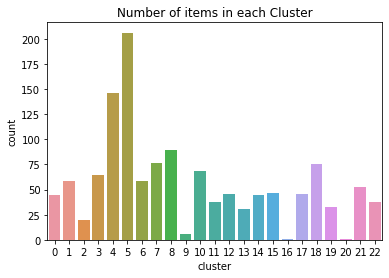

In [20]:
sns.countplot(x='cluster', data=cluster_df)
plt.title('Number of items in each Cluster')
plt.show()

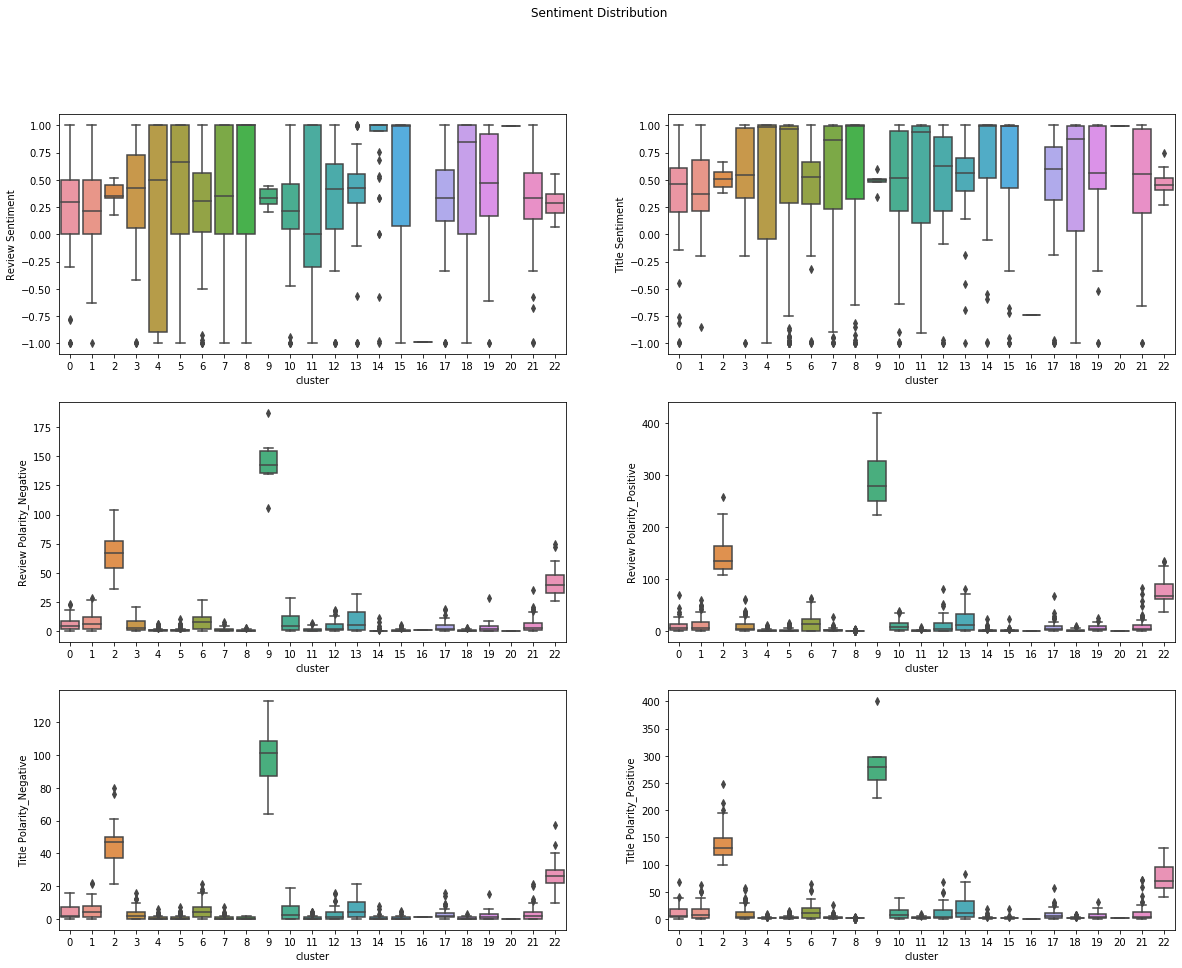

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Review Sentiment
sns.boxplot(x='cluster', y='Review Sentiment', data=cluster_df, ax=ax[0,0])

# Tile Sentiment
sns.boxplot(x='cluster', y='Title Sentiment', data=cluster_df, ax=ax[0,1])

# Review Sentiment
sns.boxplot(x='cluster', y='Review Polarity_Negative', data=cluster_df, ax=ax[1,0])

# Review Sentiment
sns.boxplot(x='cluster', y='Review Polarity_Positive', data=cluster_df, ax=ax[1,1])

# Review Sentiment
sns.boxplot(x='cluster', y='Title Polarity_Negative', data=cluster_df, ax=ax[2,0])

# Review Sentiment
sns.boxplot(x='cluster', y='Title Polarity_Positive', data=cluster_df, ax=ax[2,1])

fig.suptitle("Sentiment Distribution")
plt.show()


In [22]:
# X[ X[column_name] == value ]
cluster_df[cluster_df['cluster'] == 10]

,Clothing ID,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive,"(0, 20]","(20, 30]","(30, 40]",...,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates,cluster
119,1071 General Petite,0.001189,0.993667,1,1.0,0,2.0,0,0,0,...,0,1,0,0,0,0,0,1,0,10
122,1073 General Petite,0.813252,0.930135,0,2.0,0,1.0,0,0,2,...,0,1,0,0,0,0,0,1,0,10
123,1074 General,0.359640,0.673180,13,28.0,6,31.0,0,3,13,...,0,1,0,0,0,0,1,0,0,10
124,1074 General Petite,0.848142,0.996037,0,3.0,0,2.0,0,2,1,...,0,1,0,0,0,0,0,1,0,10
125,1075 General,0.110694,0.342110,16,20.0,11,22.0,0,1,13,...,0,1,0,0,0,0,1,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,17 General,0.998480,0.997757,0,1.0,0,1.0,0,0,1,...,0,1,0,0,0,0,1,0,0,10
401,20 General,0.998683,0.998107,0,1.0,0,1.0,0,0,1,...,0,1,0,0,0,0,1,0,0,10
467,26 General,0.745884,0.989909,0,1.0,0,1.0,0,0,1,...,0,1,0,0,0,0,1,0,0,10
500,29 General Petite,0.999250,0.999673,0,1.0,0,1.0,0,1,0,...,0,1,0,0,0,0,0,1,0,10


In [23]:
# On Cluster 16, the positive Polarity has over 100 Positive Reviews.

In [24]:
# X[ X[column_name] == value ]
cluster_df[cluster_df['cluster'] == 14]

,Clothing ID,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive,"(0, 20]","(20, 30]","(30, 40]",...,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates,cluster
276,117 Initmates,-0.000508,0.021258,2,2.0,1,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,14
333,137 Initmates,0.999766,0.996253,0,1.0,0,1.0,0,1,0,...,0,0,1,0,0,0,0,0,1,14
337,140 Initmates,0.995784,0.963548,0,1.0,0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,14
338,141 Initmates,0.999699,0.998122,0,1.0,0,1.0,0,1,0,...,0,0,1,0,0,0,0,0,1,14
339,142 Initmates,-0.572530,-0.001924,4,1.0,2,2.0,1,0,1,...,0,0,1,0,0,0,0,0,1,14
341,144 Initmates,0.999335,0.997355,0,6.0,0,3.0,0,3,0,...,0,0,1,0,0,0,0,0,1,14
349,151 Initmates,0.999929,0.998561,0,1.0,0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,1,14
352,155 Initmates,0.536348,0.853813,3,10.0,1,10.0,0,2,6,...,0,0,1,0,0,0,0,0,1,14
353,156 Initmates,0.998990,0.095197,0,2.0,1,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,14
354,157 Initmates,0.333162,0.992042,1,2.0,0,3.0,0,1,0,...,0,0,1,0,0,0,0,0,1,14


In [25]:
age_columns = age_df.columns
age_columns

Index([  (0, 20],  (20, 30],  (30, 40],  (40, 50],  (50, 60],  (60, 70],
        (70, 80],  (80, 90], (90, 150]],
      dtype='object')

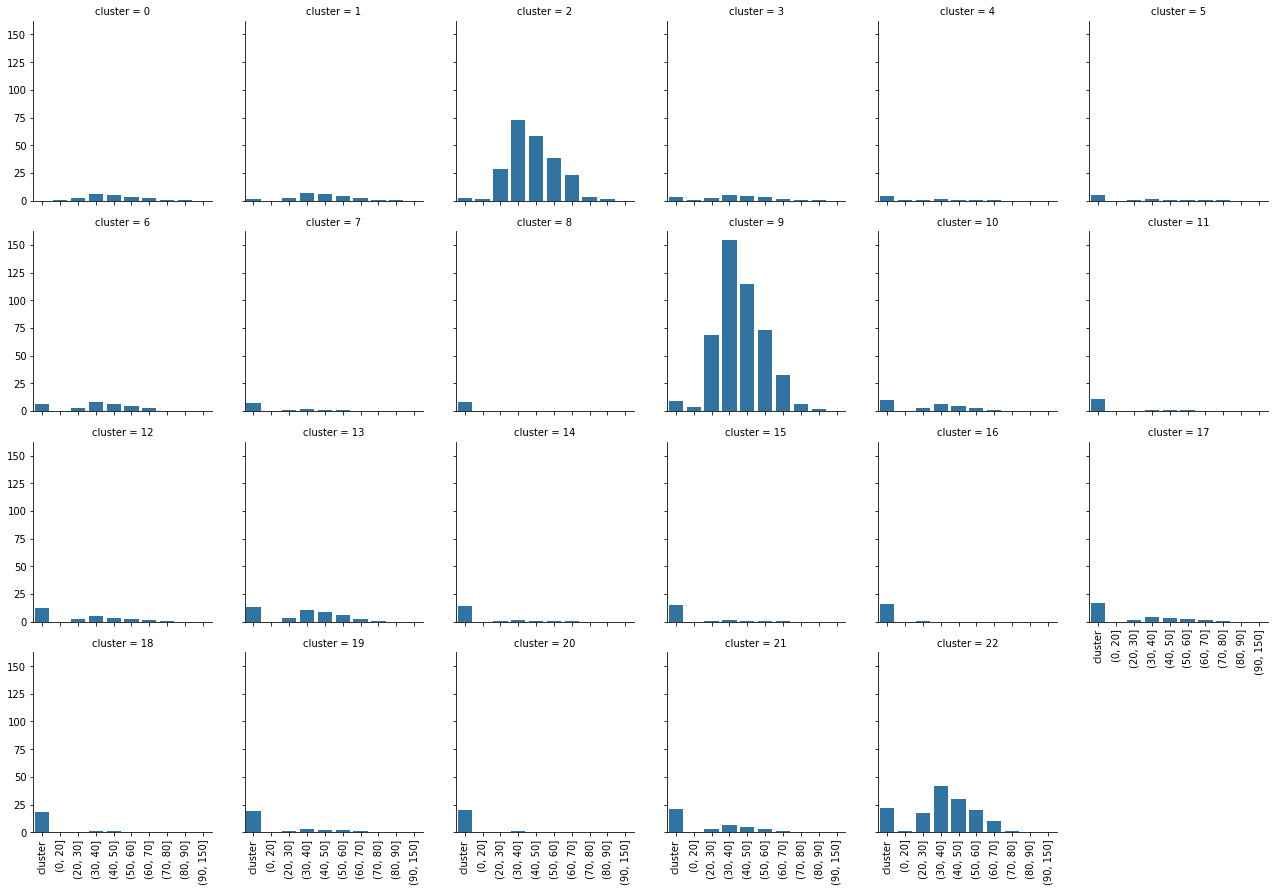

In [26]:
age_columns = age_df.columns
cluster_mean_age_df = cluster_df.groupby('cluster').mean()[age_columns].reset_index()

g = sns.FacetGrid(cluster_mean_age_df, col='cluster', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

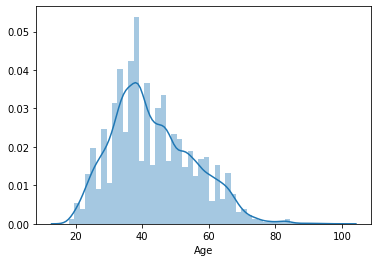

In [27]:
sns.distplot(raw_data['Age'])

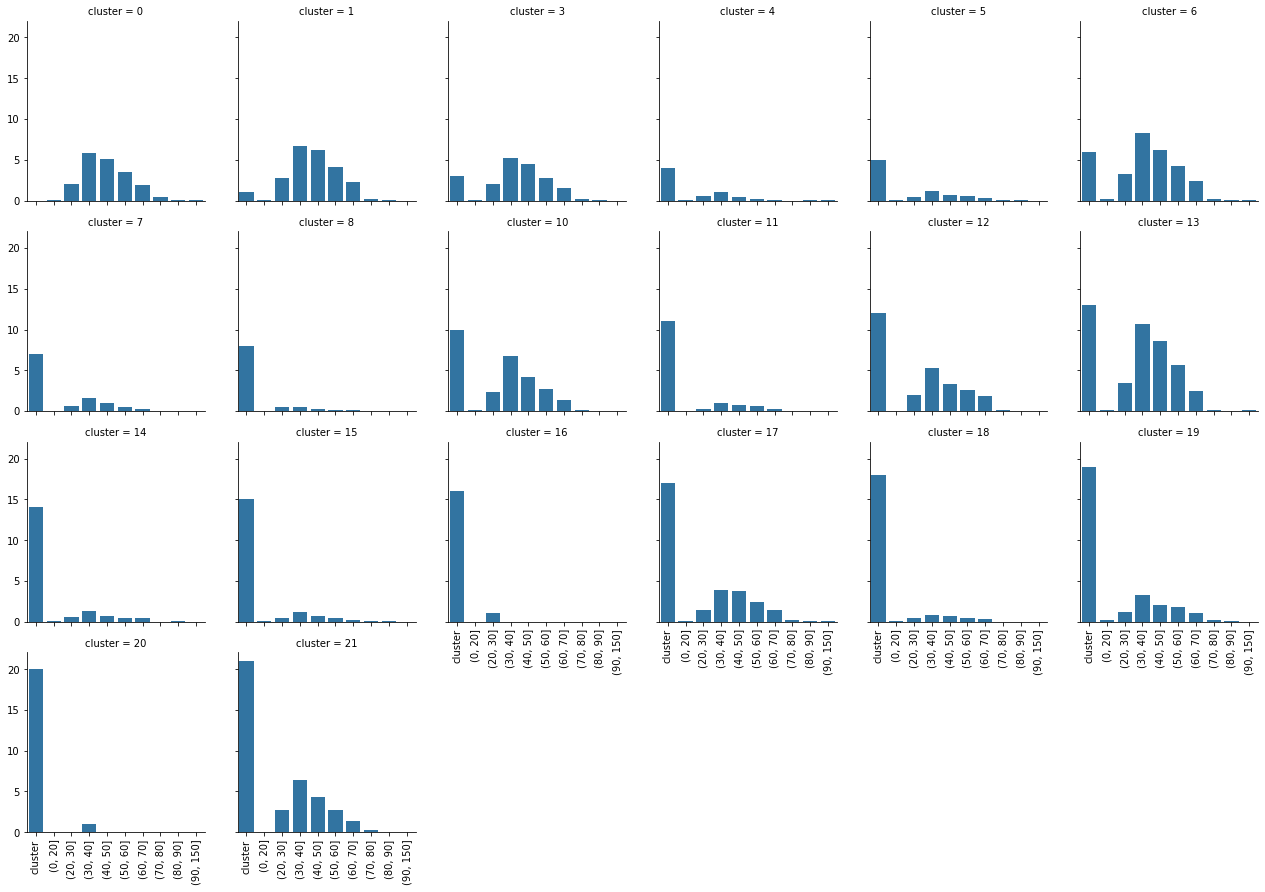

In [28]:
age_columns = age_df.columns
cluster_mean_age_df = cluster_df.groupby('cluster').mean()[age_columns].reset_index()
df2 = cluster_mean_age_df[~cluster_mean_age_df['cluster'].isin([2,9,22])]

g = sns.FacetGrid(df2, col='cluster', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

In [29]:
# Ages between 30-50 are the most prominent age group to give Reviews and Ratings.
# No significant difference was found between the clusters in terms of Age. In other words, 
# clusters behave similarly wrt Age.

In [30]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 1 to 1394
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clothing ID                   1290 non-null   object 
 1   Review Sentiment              1290 non-null   float64
 2   Title Sentiment               1290 non-null   float64
 3   Review Polarity_Negative      1290 non-null   uint8  
 4   Review Polarity_Positive      1290 non-null   float64
 5   Title Polarity_Negative       1290 non-null   uint8  
 6   Title Polarity_Positive       1290 non-null   float64
 7   (0, 20]                       1290 non-null   uint8  
 8   (20, 30]                      1290 non-null   uint8  
 9   (30, 40]                      1290 non-null   uint8  
 10  (40, 50]                      1290 non-null   uint8  
 11  (50, 60]                      1290 non-null   uint8  
 12  (60, 70]                      1290 non-null   uint8  
 13  (70

In [31]:
class_columns = class_df.columns[np.where(class_df.columns.str.contains("Class Name"))]

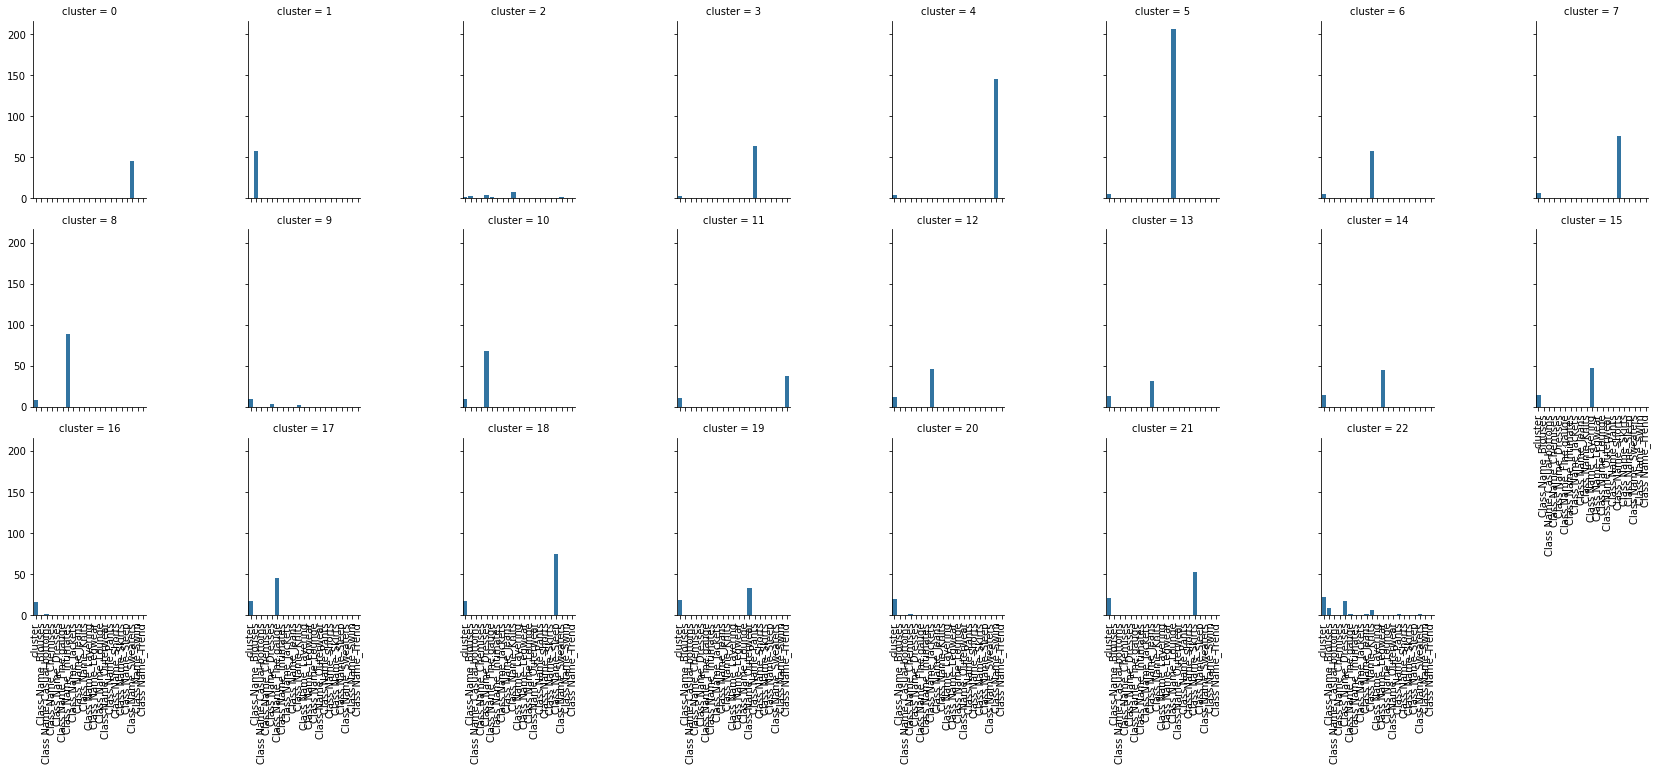

In [32]:
class_columns = class_df.columns[np.where(class_df.columns.str.contains("Class Name"))]
cluster_class_df = cluster_df.groupby('cluster').sum()[class_columns].reset_index()

g = sns.FacetGrid(cluster_class_df, col='cluster', col_wrap=8)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

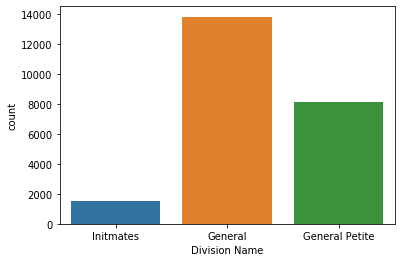

In [33]:
sns.countplot(raw_data['Division Name'])

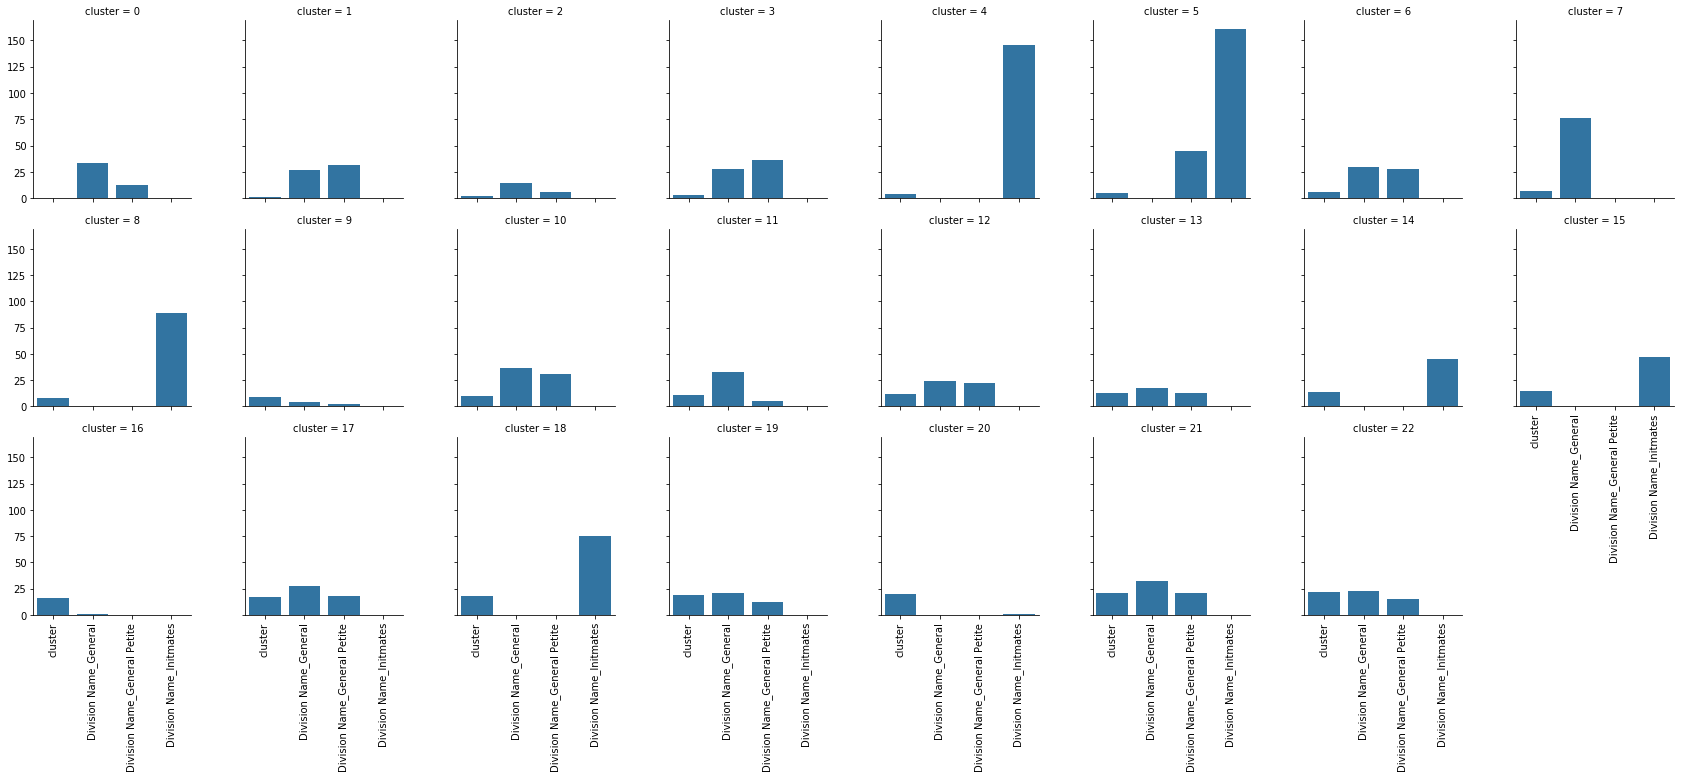

In [34]:
division_columns = class_df.columns[np.where(class_df.columns.str.contains("Division Name"))]
cluster_class_df = cluster_df.groupby('cluster').sum()[division_columns].reset_index()

g = sns.FacetGrid(cluster_class_df, col='cluster', col_wrap=8)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

In [35]:
# Cluster 4, 5, 8, 18 similar on the basis of Intimates

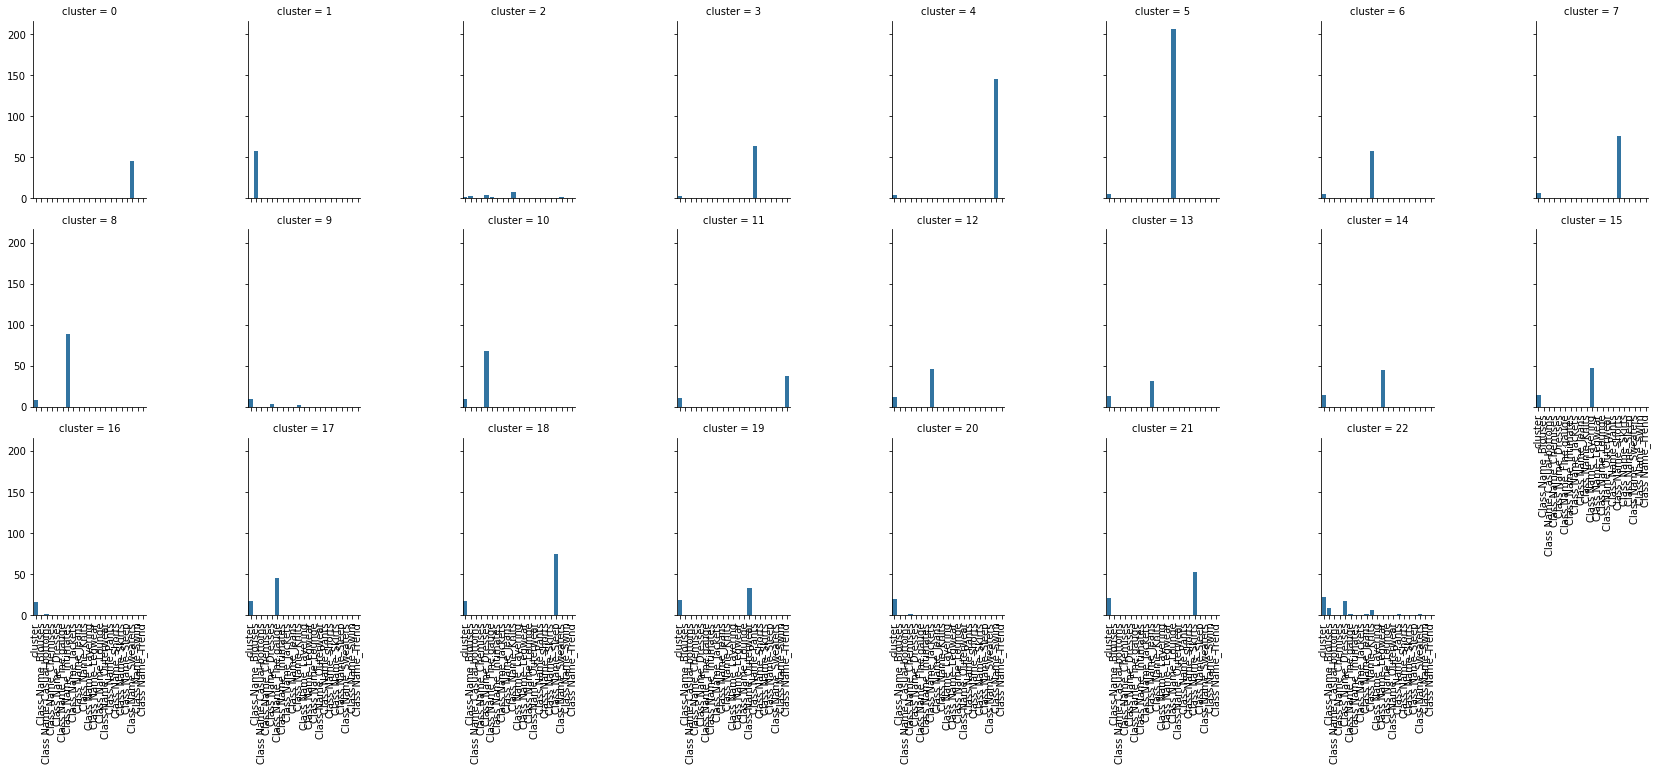

In [36]:
dept_columns = class_df.columns[np.where(class_df.columns.str.contains("Department Name"))]
cluster_class_df = cluster_df.groupby('cluster').sum()[class_columns].reset_index()

g = sns.FacetGrid(cluster_class_df, col='cluster', col_wrap=8)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

In [ ]:
# Interest Feature - Class name, Division Name, Department Name

In [ ]:
cluster_df